In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from matplotlib.patches import Rectangle

import matplotlib as mpl
my_params = mpl.rcParams

%matplotlib inline


C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
0,0.1,0.5,2.1,19,5,379,3.54,15.10
1,1.0,4.0,1.1,16,13,269,5.79,21.30
2,1.9,19.0,1.0,14,12,245,8.51,22.75
3,3.1,21.7,2.1,17,6,273,11.52,15.72
4,4.1,24.6,2.9,11,10,237,10.16,7.71
5,4.9,39.2,1.1,12,7,278,11.14,22.67
6,5.9,23.6,2.1,13,13,241,15.04,18.11
7,7.0,63.0,2.0,13,20,269,15.10,24.30
8,8.1,72.9,2.9,14,1,248,14.49,24.04
9,8.9,35.6,2.8,16,1,210,16.90,25.11


#### Confidence interval for the population correlation coefficient

Another way to look at it: given the confidence level of 95%, the number of wells (and from that the degrees of freedom), and the sample correlation coefficient, we can calculate the confidence interval for the population correlation coefficient (P97.5 and P2.5).

Here's a convenient function to calculate it; for the details of the colaculation, again, see <a href = "http://brownmath.com/stat/correl.htm#CI"> Brown</a>.

In [3]:
def confInt(r, nwells):
    z_crit = sp.stats.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1)
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

With 21 wells:

In [4]:
np.set_printoptions(precision=2)
cm21 = np.asarray([confInt(r, 21) for r in (np.arange(0.00,1.05,0.05))]).T
print cm21

[[ 0.43  0.47  0.51  0.55  0.58  0.62  0.65  0.68  0.71  0.74  0.77  0.79
   0.82  0.84  0.87  0.89  0.92  0.94  0.96  0.98  1.  ]
 [-0.43 -0.39 -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.04  0.02  0.09  0.16
   0.23  0.3   0.38  0.47  0.56  0.66  0.77  0.88  1.  ]]


In [5]:
crr = np.arange(0.0,1.05,0.05).round(decimals=2)

CI21 = pd.DataFrame(cm21, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

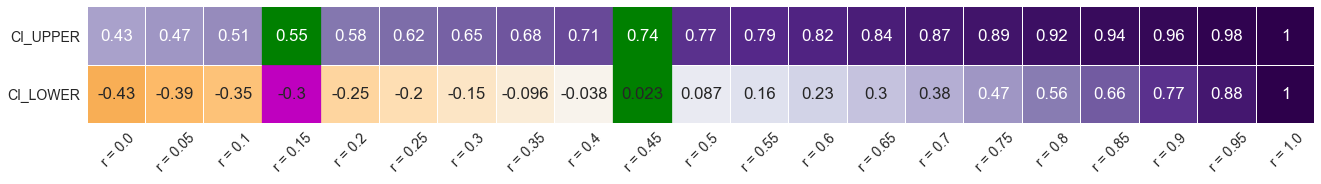

In [6]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI21, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((3,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((3,1), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,0), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,1), 1, 1, fill=True, color = 'green')) 
plt.show()

This tells us a bit more than just the critical r test. 

Discuss as in **Chambers and Yarus (2002, Reference 4)**

We see again that it takes at least a correlation coefficient of 0.45 (greater than the critical r = 0.43) 
but also.....

Interesting to see what happens with only 5 wells:

In [7]:
cm5 = np.asarray([confInt(r, 5) for r in (np.arange(0.00,1.05,0.05))]).T

In [8]:
print cm5

[[ 0.88  0.89  0.9   0.91  0.92  0.93  0.93  0.94  0.95  0.95  0.96  0.96
   0.97  0.97  0.98  0.98  0.99  0.99  0.99  1.    1.  ]
 [-0.88 -0.87 -0.86 -0.84 -0.83 -0.81 -0.79 -0.77 -0.75 -0.72 -0.68 -0.65
  -0.6  -0.54 -0.48 -0.39 -0.28 -0.13  0.09  0.42  1.  ]]


In [9]:
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

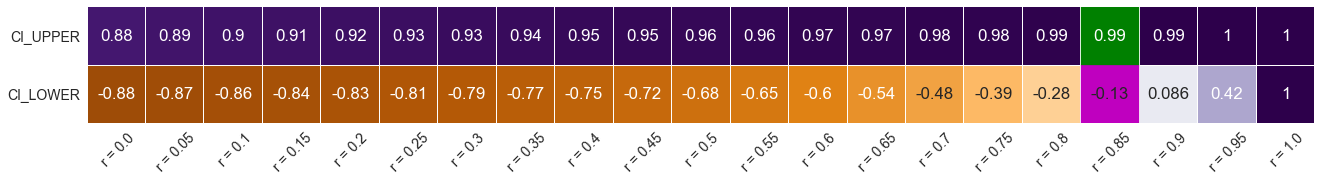

In [10]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI5, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((17,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((17,1), 1, 1, fill=True, color = 'green')) 
plt.show()

With only 5 wells even Gross pay technically does not pass the test

In [11]:
cm5 = np.asarray([confInt(r, 5) for r in (np.arange(0.00,1.05,0.05))]).T
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm10 = np.asarray([confInt(r, 10) for r in (np.arange(0.00,1.05,0.05))]).T
CI10 = pd.DataFrame(cm10, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm15 = np.asarray([confInt(r, 15) for r in (np.arange(0.00,1.05,0.05))]).T
CI15 = pd.DataFrame(cm15, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm20 = np.asarray([confInt(r, 20) for r in (np.arange(0.00,1.05,0.05))]).T
CI20 = pd.DataFrame(cm20, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm25 = np.asarray([confInt(r, 25) for r in (np.arange(0.00,1.05,0.05))]).T
CI25 = pd.DataFrame(cm25, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm30 = np.asarray([confInt(r, 30) for r in (np.arange(0.00,1.05,0.05))]).T
CI30 = pd.DataFrame(cm30, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

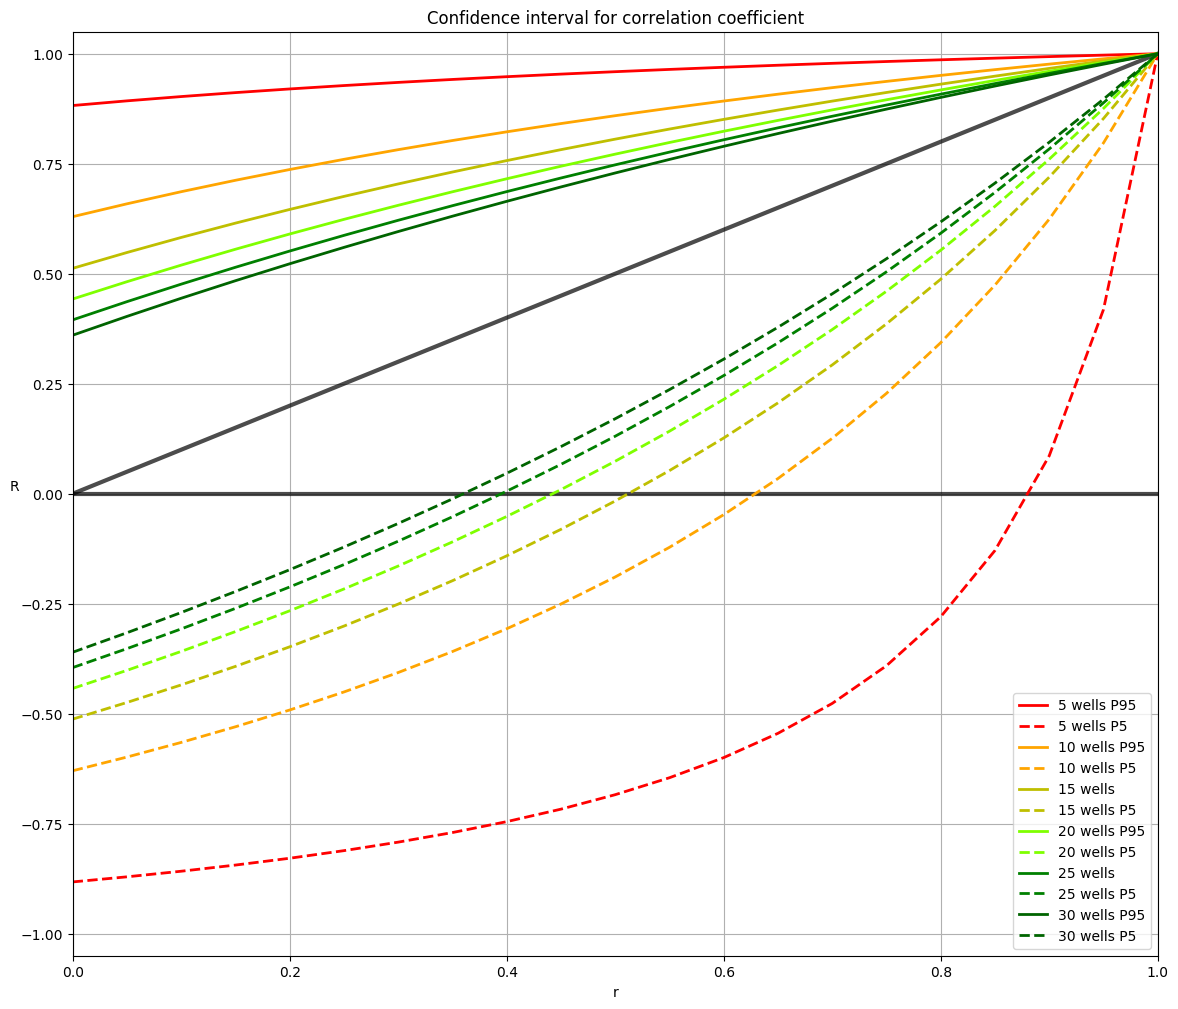

In [12]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(14,12))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm10[0,:],  'Orange', linewidth= 2, label = '10 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm10[1,:], '--', color = 'Orange', linewidth= 2, label = '10 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm15[0,:],  'y', linewidth= 2, label = '15 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm15[1,:], 'y--', linewidth= 2, label = '15 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm20[0,:], 'chartreuse', linewidth= 2, label = '20 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm20[1,:], '--', color = 'chartreuse', linewidth= 2, label = '20 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm25[0,:],  'g', linewidth= 2, label = '25 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm25[1,:], 'g--', linewidth= 2, label = '25 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm30[0,:],  'darkgreen', linewidth= 2, label = '30 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm30[1,:], '--', color = 'darkgreen', linewidth= 2, label = '30 wells P5')
plt.legend()
plt.grid();

